In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [12]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def comprehensive_preprocessing(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Menghapus karakter khusus dan angka
    text = re.sub(r'\W|[\d_]', ' ', text)

    # Menghapus kata yang berulang
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # Menghapus emoji atau simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s#]', ' ', text)

    # Menghapus kata-kata singkat
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Mengonversi teks ke huruf kecil
    text = text.lower()

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    # Buat stemmer
    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()

    # Buat stopword remover
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()

    text = stopword_remover.remove(text)

    # # Stemming
    # text = stemmer.stem(text)

    return text

In [13]:
df = pd.read_csv('data/dataset_jurnal_indo_5k.csv')

df['data'] = df['title'] + df['abstrac_clean']
df

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
4995,10480,oai:ojs.forikes-ejournal.com:article/623,2019-12-23,Efek Pemberian Depo Medroxy Progesteron Acetat...,Long term DMPA usage causes impaired estrogen ...,penggunaan dmpa jangka panjang menghambat perl...,Efek Pemberian Depo Medroxy Progesteron Acetat...
4996,10480,oai:ojs.forikes-ejournal.com:article/1727,2021-11-30,Faktor yang Berhubungan dengan Stigma Masyarak...,Stigma and discrimination as well as changes i...,stigma dan diskriminasi serta perubahan pola h...,Faktor yang Berhubungan dengan Stigma Masyarak...
4997,10480,oai:ojs.forikes-ejournal.com:article/901,2020-07-28,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,Background: The biggest problem of transmissio...,latar belakang: masalah terbesar penularan pen...,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...
4998,10480,oai:ojs.forikes-ejournal.com:article/1460,2021-07-14,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,Anemia is the main cause of the high maternal ...,anemia adalah penyebab utama angka kematian ib...,Kurma Sebagai Alternatif untuk Meningkatkan Ka...


In [14]:
data = df['data'].astype(str).apply(comprehensive_preprocessing)
data

df['data_clean'] = data
# df.to_csv('dataset_clean_5k.csv')
df

data_jid = df[df['jid']==10004]
data_jid

data = data_jid['data'].astype(str).apply(comprehensive_preprocessing)



In [15]:
data_jid

,jid,aid,date,title,desc,abstrac_clean,data,data_clean
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,efektivitas perlakuan ozon mutu kangkung khas ...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,penyimpanan mangga modifikasi atmosfir penggun...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,pengaruh rasio susu full cream jagung manis ze...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,kajian mutu daya simpan keju mozzarella probio...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,pengaruh penambahan probiotik lactobacillus ca...
...,...,...,...,...,...,...,...,...
104,10004,oai:ojs2.profood.unram.ac.id:article/205,2022-01-15,KARAKTERISASI BAKTERI LIPOLITIK Bacillus sp. P...,ABSTRACT\nOne of the leading enzymes having th...,salah satu enzim utama berpotensi menyumbang k...,KARAKTERISASI BAKTERI LIPOLITIK Bacillus sp. P...,karakterisasi bakteri lipolitik bacillus wadi ...
105,10004,oai:ojs2.profood.unram.ac.id:article/209,2022-01-24,Kajian Penambahan Ubi Jalar Ungu (Ipomoea bata...,ABSTRACT\nYoghurt is a drink made from the fer...,yoghurt adalah minuman yang terbuat dari prose...,Kajian Penambahan Ubi Jalar Ungu (Ipomoea bata...,kajian penambahan ubi jalar ungu ipomoea batat...
106,10004,oai:ojs2.profood.unram.ac.id:article/215,2021-12-31,KARAKTERISASI MUTU TEH HITAM METODE CTC (Crush...,Abstract\nThis study aims to test the quality ...,penelitian ini bertujuan untuk menganalisis mu...,KARAKTERISASI MUTU TEH HITAM METODE CTC (Crush...,karakterisasi mutu teh hitam metode ctc crushi...
107,10004,oai:ojs2.profood.unram.ac.id:article/225,2022-01-15,"ANALISIS MUTU KIMIA, MIKROBIOLOGI DAN ORGANOLE...",ABSTRACT\nThis study was aimed to analyze the ...,penelitian ini bertujuan untuk menganalisis mu...,"ANALISIS MUTU KIMIA, MIKROBIOLOGI DAN ORGANOLE...",analisis mutu kimia mikrobiologi organoleptik ...


In [16]:
df['data_clean'] = data
# df.to_csv('dataset_clean_5k.csv')
df

,jid,aid,date,title,desc,abstrac_clean,data,data_clean
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,efektivitas perlakuan ozon mutu kangkung khas ...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,penyimpanan mangga modifikasi atmosfir penggun...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,pengaruh rasio susu full cream jagung manis ze...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,kajian mutu daya simpan keju mozzarella probio...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,pengaruh penambahan probiotik lactobacillus ca...
...,...,...,...,...,...,...,...,...
4995,10480,oai:ojs.forikes-ejournal.com:article/623,2019-12-23,Efek Pemberian Depo Medroxy Progesteron Acetat...,Long term DMPA usage causes impaired estrogen ...,penggunaan dmpa jangka panjang menghambat perl...,Efek Pemberian Depo Medroxy Progesteron Acetat...,NaN
4996,10480,oai:ojs.forikes-ejournal.com:article/1727,2021-11-30,Faktor yang Berhubungan dengan Stigma Masyarak...,Stigma and discrimination as well as changes i...,stigma dan diskriminasi serta perubahan pola h...,Faktor yang Berhubungan dengan Stigma Masyarak...,NaN
4997,10480,oai:ojs.forikes-ejournal.com:article/901,2020-07-28,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,Background: The biggest problem of transmissio...,latar belakang: masalah terbesar penularan pen...,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,NaN
4998,10480,oai:ojs.forikes-ejournal.com:article/1460,2021-07-14,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,Anemia is the main cause of the high maternal ...,anemia adalah penyebab utama angka kematian ib...,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,NaN


In [17]:
# Menerapkan vektorisasi TF-IDF pada deskripsi jurnal
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
X = tfidf_matrix

In [18]:
# Menentukan jumlah cluster yang diinginkan
jumlah_cluster = 1

# Menerapkan algoritma K-Means
kmeans = KMeans(n_clusters=jumlah_cluster)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=1)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Mendapatkan pusat kluster
cluster_centers = kmeans.cluster_centers_

# Menghitung similarity antara setiap data dengan pusat kluster
similarities = cosine_similarity(tfidf_matrix, cluster_centers)

# Menerapkan jarak threshold untuk menentukan in-scope dan out-of-scope
distance_threshold = 0.7  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan
in_scope_indices = np.where(similarities.max(axis=1) > distance_threshold)[0]
out_of_scope_indices = np.where(similarities.max(axis=1) <= distance_threshold)[0]

# Menampilkan hasil
print("In-scope indices:", in_scope_indices)
print("Out-of-scope indices:", out_of_scope_indices)


In-scope indices: []
Out-of-scope indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108]


c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


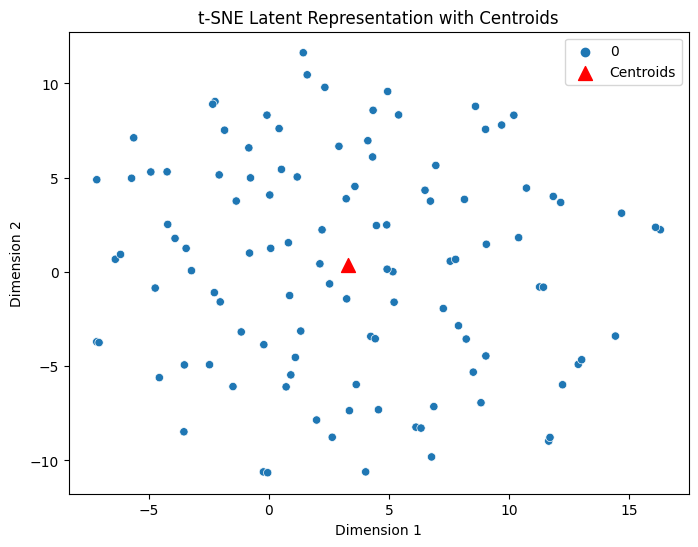

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def plot_vector_distribution(tfidf_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')
    
    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(tfidf_matrix, kmeans.labels_)


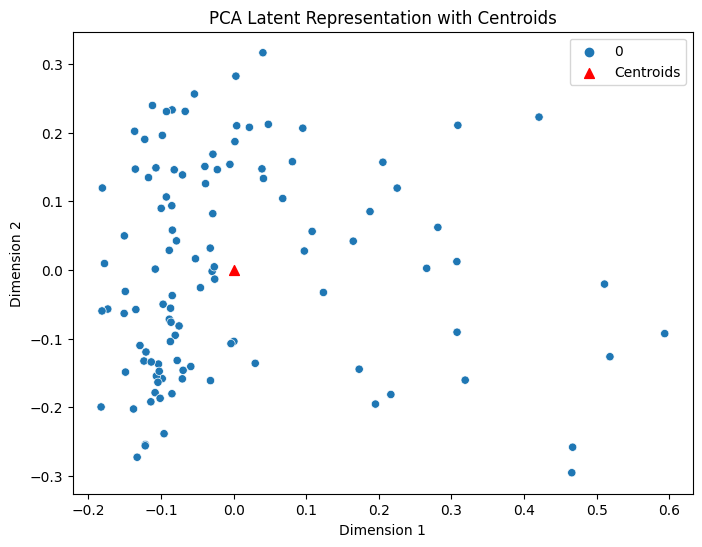

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation.toarray())

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(tfidf_matrix, kmeans.labels_)

In [23]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
# Misalnya, jika ingin menentukan data yang berjarak lebih dari 2 kali standar deviasi dari centroid
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    # df_pca['Cluster Label'] = kmeans_labels
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels)